In [1]:
#regression
#In this notebook we will try to predict the price of the diamond and our question would be:
#Can we predict the diamond's price based on the other features?

In [2]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [3]:
#Reading the dataset
diamond=pd.read_csv(r"C:\Users\ariki\diamonds.csv") 

In [4]:
#Shot the first 10 rows of the dataset
diamond.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
#Drop the unnamed col cause we already has a col of count
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)

In [6]:
#Checking if there is null in each column in the dataset
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#look at some sumarry statistics of the dataframe
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#After we dound out that the x,y,z each of them has a value 0 which not make sense
#becuase the value should be higher than 0 we will drop all the rows
#with the value 0 in the columns x,y,z.
#First we will check how much rows have this, then we will drop them and show the sumarry statistics of the data again.
len(diamond.loc[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)])

20

In [9]:
diamond = diamond.drop(diamond.loc[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)].index)
diamond.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220561A2908>,
      dtype=object)

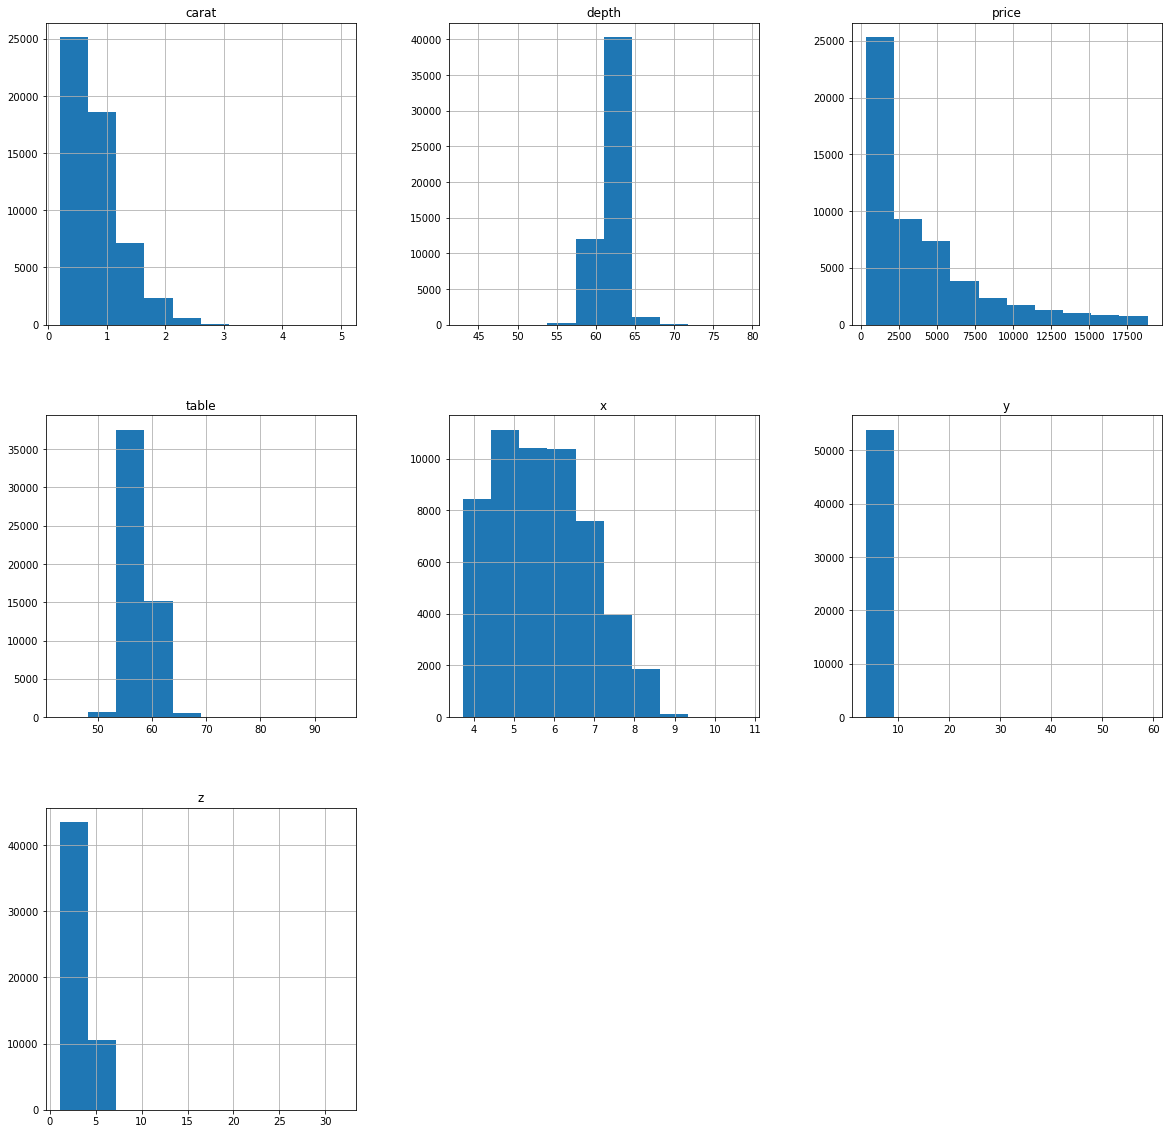

In [10]:
#Showing every feature in its own graph
#The string features i will show in columns diagram
diamond.hist(figsize=(20,20))

c:\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


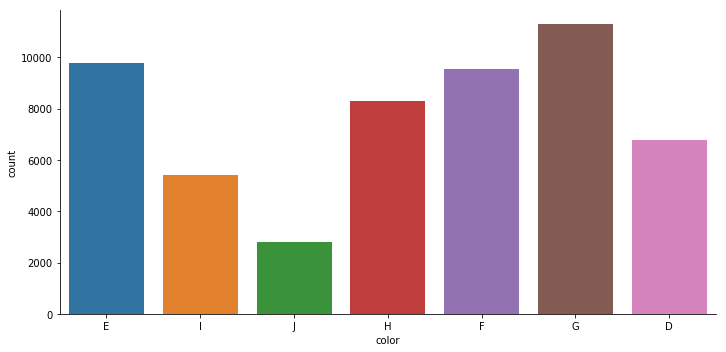

In [11]:
#Count the diamonds for each color from D to J
sns.factorplot(x='color', data=diamond, kind = 'count' ,aspect=2 )

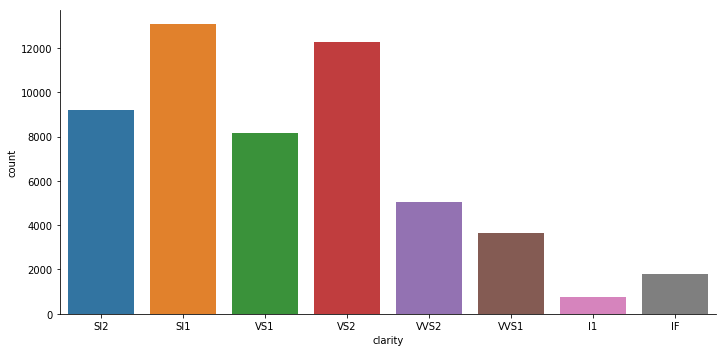

In [12]:
#Count the diamonds for each clarity 
sns.factorplot(x='clarity', data=diamond, kind = 'count' ,aspect=2 )

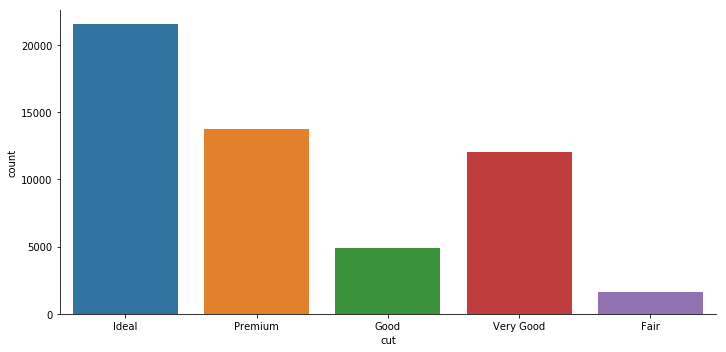

In [13]:
#Count the diamonds for each quality of the cut
sns.factorplot(x='cut', data=diamond, kind = 'count' ,aspect=2 )

In [14]:
#As we can't feed String data for Modelling, we will change the columns - cut, clarity and color to num values
#To do that mission we will use the function that change string to num - fit_transform()
lb_cut = LabelEncoder()
lb_color = LabelEncoder()

diamond['cut'] = lb_cut.fit_transform(diamond['cut'])
diamond['color'] = lb_color.fit_transform(diamond['color'])


diamond_clarity = {'I1':7,
                   'SI2':6,
                   'SI1':5,
                   'VS2':4,
                   'VS1':3,
                   'VVS2':2,
                   'VVS1':1,
                   'IF':0}
diamond.clarity = diamond.clarity.map(diamond_clarity);

In [15]:
diamond.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,5,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,3,59.4,61.0,338,4.00,4.05,2.39


In [16]:
#Cut - 'fair' = 0(worst), 'good' = 1, 'very good' = 2, 'premium' = 3 , 'ideal' = 4(best)
#color - 'D' = 0(best), 'E' = 1, 'F' = 2, 'G' = 3, 'H' = 4, 'I' = 5 , 'J' = 6(worst)
#Clarity - 'I1':7(worst), 'SI2':6, 'SI1':5, 'VS2':4, 'VS1':3, 'VVS2':2, 'VVS1':1, 'IF':0(best)

In [17]:
#Modeling
#First we will define X , Y - x = all the features except the feature 'price' and y = 'price'.
#Second we will divide our dataset into testing and training dataset.

X = diamond.drop(['price'], axis=1)
y = diamond['price']
X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=4) #split the data to training and testing dataset

In [18]:
#Linear Regression

#import the model
from sklearn.linear_model import LinearRegression 

#create the model
linerg = LinearRegression() 

#Enter the data training to the model
linerg.fit(X_train, y_train) 

#Accuracy percentages
accuracy = linerg.score(X_test,y_test)

print('% Linear regression accuracy: ', accuracy*100)



% Linear regression accuracy:  91.09782516419837


In [19]:
#Random Forest Regressor

#import the model
from sklearn.ensemble import RandomForestRegressor

#create the model
rand_fo = RandomForestRegressor(n_estimators = 100) #create the model, The number of trees in the forest.

#Enter the data training to the model, build a forest of trees from the training set.
rand_fo.fit(X_train , y_train)

#Accuracy percentages
accuracy =  rand_fo.score(X_test, y_test)

print('% Random forest regression accuracy:', accuracy*100)


% Random forest regression accuracy: 98.18937358426011
